In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import pandas as pd

%matplotlib inline

In [2]:
def array2dataframe(loss_array, estimator, every_n=500):
    nseeds, nsteps = loss_array.shape
    data_for_pd = []
    estimator_name = estimator.upper()

    for i in range(nseeds):
        for j in range(nsteps):
            data_for_pd.append(
                [j * every_n, loss_array[i, j], estimator_name]
            )
    dataframe = pd.DataFrame(data=data_for_pd, columns=["Steps", "Loss", "Estimator"])
    return dataframe

In [3]:
def load_statistics(estimator):
    mean_obj = []
    with open("./exp_log/history_{0}.pkl".format(estimator), "rb") as file:
        history = pickle.load(file)

    mean_obj.append(history["mean_objective"])
    mean_obj = np.array(mean_obj)
    return array2dataframe(mean_obj, estimator)

In [4]:
statistics_dataframe = pd.concat([
    load_statistics("E_reinforce"),
    load_statistics("T_reinforce"),
    load_statistics("E_reinforce+"),
    load_statistics("T_reinforce+"),
    load_statistics("relax")
], ignore_index=True)


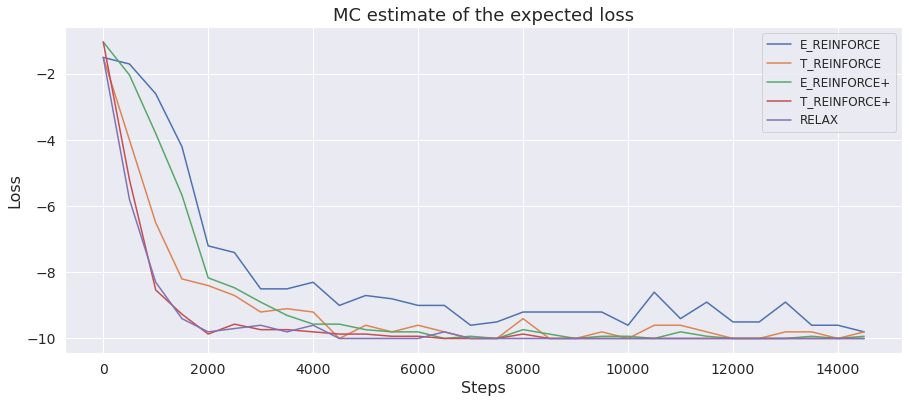

In [5]:
plt.figure(figsize=(15, 6))
sns.lineplot(
    x="Steps", y="Loss", hue="Estimator", data=statistics_dataframe,
    hue_order=["E_REINFORCE", "T_REINFORCE", "E_REINFORCE+", "T_REINFORCE+", "RELAX"]
)
plt.legend(fontsize=12)
plt.title('MC estimate of the expected loss', fontsize=18)
plt.xlabel('Steps', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.tick_params(labelsize=14)
plt.show()
